In [1]:
import os
import imp
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import sys
import pickle as plk
import importlib.util
import scipy.optimize
import scipy.signal
from IPython.display import display, Math

###############################################################
# LINUX PATH

# sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
# import lumapi
# sys.path.append(os.path.dirname('/home/fotonica04/Documentos/GitHub/Photonics-training/Projects/Hybrid4x4/InterconnectFiles')) #Current directory


###############################################################
# WINDOWS PATH

spec_win = importlib.util.spec_from_file_location('lumapi', 'C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py')
lumapi = importlib.util.module_from_spec(spec_win)
os.add_dll_directory("C:/Program Files/Lumerical/v202/api/python")
sys.path.append(os.path.dirname('C:/Users/Caio/Documents/GitHub/Photonics-training/Projects/Hybrid4x4/InterconnectFiles/'))
spec_win.loader.exec_module(lumapi)

## Lumapi init

In [2]:
#mmi = lumapi.INTERCONNECT(filename='CHIP_ref.icp')
#mmi = lumapi.INTERCONNECT(filename='CHIP_port1.icp')
#mmi = lumapi.INTERCONNECT(filename='CHIP_port2.icp')
mmi = lumapi.INTERCONNECT(filename='CHIP_series2.icp')

## Reference gain

Center Wavelength: 1.5483870967728607e-06, Limits: 1.49843912590793e-06/1.5983350676377913e-06


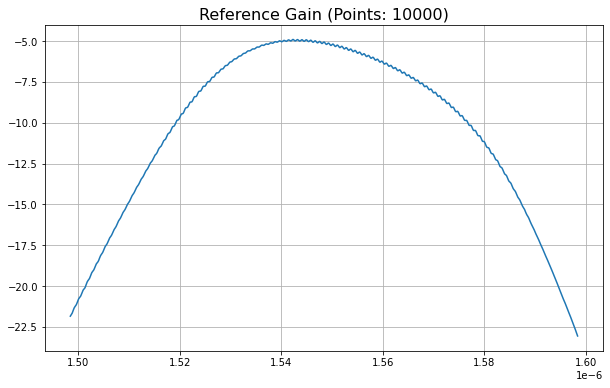

In [4]:
c = 299792458
mmi.select('ONA_1')
CenterWv = c/mmi.get('center frequency')
RangeWv = mmi.get('frequency range')*CenterWv**2/c

ResRef = np.array(mmi.getresultdata('ONA_1','input 1/mode 1/gain')[:,0])
Xarray = np.linspace(CenterWv-RangeWv/2,CenterWv+RangeWv/2,10000)
print(f'Center Wavelength: {CenterWv}, Limits: {CenterWv-RangeWv/2}/{CenterWv+RangeWv/2}')
plt.figure(figsize=(10,6))
plt.title(f'Reference Gain (Points: {len(Xarray)})', fontsize=16)
plt.plot(Xarray,ResRef, label='Ref')
plt.grid(True)
# plt.xlim(1530e-9,1565e-9)
# plt.ylim(-8,-5)

DataRef = {'Xarray':Xarray, 'ResRef':ResRef}

MSOutfile = open('SavedData/RefGain_Waveguide','wb')
plk.dump(DataRef,MSOutfile)
MSOutfile.close()

datapath = 'Media'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig("Media/Ref_CHIP" + str(file_count) + ".png", transparent=False, facecolor="white", bbox_inches="tight")

## Port 1 Input

Center Wavelength: 1.5483870967728607e-06, Limits: 1.49843912590793e-06/1.5983350676377913e-06


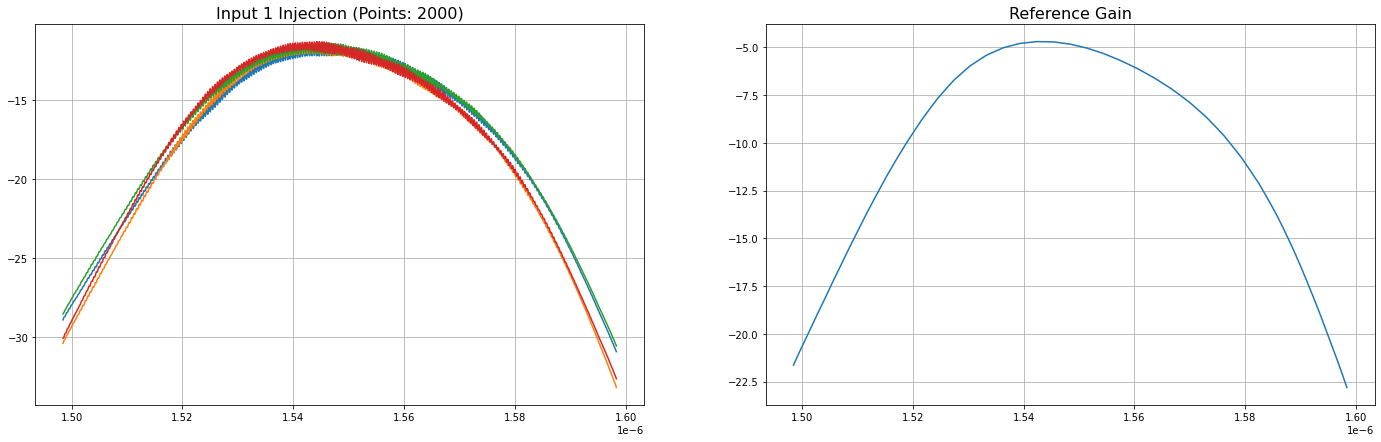

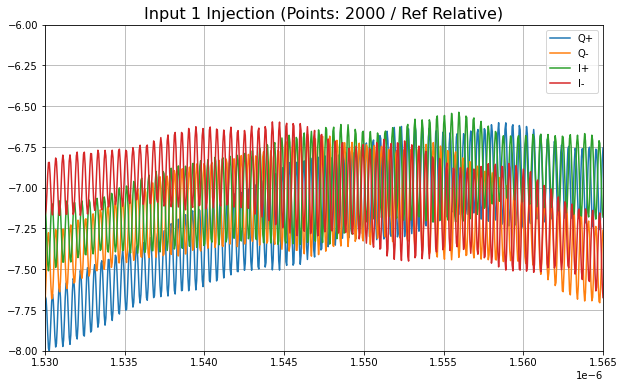

In [3]:
c = 299792458
mmi.select('ONA_1')
CenterWv = c/mmi.get('center frequency')
RangeWv = mmi.get('frequency range')*CenterWv**2/c

Res_QP = np.array(mmi.getresultdata('ONA_1','input 1/mode 1/gain')[:,0])
Res_IP = np.array(mmi.getresultdata('ONA_1','input 2/mode 1/gain')[:,0])
Res_QN = np.array(mmi.getresultdata('ONA_1','input 3/mode 1/gain')[:,0])
Res_IN = np.array(mmi.getresultdata('ONA_1','input 4/mode 1/gain')[:,0])
Xarray = np.linspace(CenterWv-RangeWv/2,CenterWv+RangeWv/2,2000)
print(f'Center Wavelength: {CenterWv}, Limits: {CenterWv-RangeWv/2}/{CenterWv+RangeWv/2}')

infile = open(os.path.join('SavedData', 'RefGain_Couplers') , 'rb')
DataLoaded = plk.load(infile)
infile.close()

fig, ax= plt.subplots(1,2,figsize=(24,7))
ax[0].set_title(f'Input 1 Injection (Points: {len(Xarray)})', fontsize=16)
ax[0].plot(Xarray,Res_QP, label='Q+')
ax[0].plot(Xarray,Res_QN, label='Q-')
ax[0].plot(Xarray,Res_IP, label='I+')
ax[0].plot(Xarray,Res_IN, label='I-')
ax[0].grid(True)

ax[1].set_title(f'Reference Gain', fontsize=16)
ax[1].plot(Xarray,DataLoaded['ResRef'], label='Ref')
ax[1].grid(True)

plt.figure(figsize=(10,6))
plt.title(f'Input 1 Injection (Points: {len(Xarray)} / Ref Relative)', fontsize=16)
plt.plot(Xarray,Res_QP - DataLoaded['ResRef'], label='Q+')
plt.plot(Xarray,Res_QN - DataLoaded['ResRef'], label='Q-')
plt.plot(Xarray,Res_IP - DataLoaded['ResRef'], label='I+')
plt.plot(Xarray,Res_IN - DataLoaded['ResRef'], label='I-')
plt.grid(True)
plt.legend()
plt.xlim(1530e-9,1565e-9)
plt.ylim(-8,-6)

datapath = 'Media'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig("Media/in1_CHIP" + str(file_count) + ".png", transparent=False, facecolor="white", bbox_inches="tight")

## Port 2 Input

Center Wavelength: 1.5483870967728607e-06, Limits: 1.49843912590793e-06/1.5983350676377913e-06


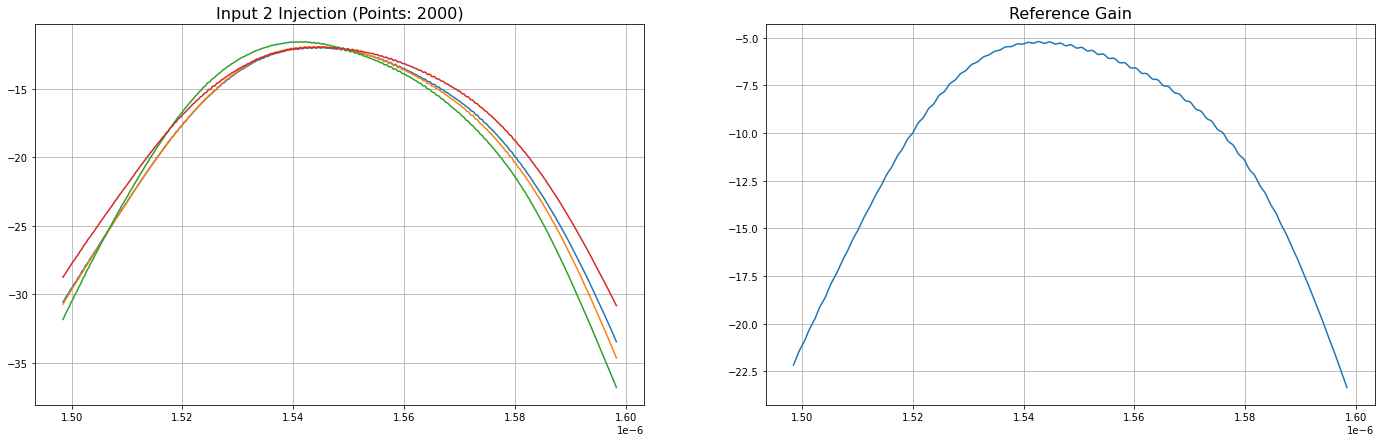

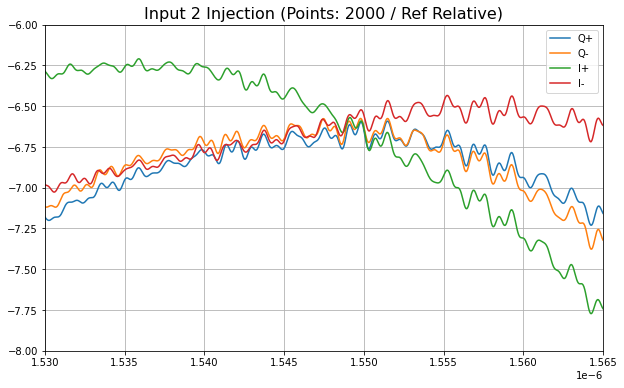

In [4]:
c = 299792458
mmi.select('ONA_1')
CenterWv = c/mmi.get('center frequency')
RangeWv = mmi.get('frequency range')*CenterWv**2/c

Res_QP = np.array(mmi.getresultdata('ONA_1','input 1/mode 1/gain')[:,0])
Res_IP = np.array(mmi.getresultdata('ONA_1','input 2/mode 1/gain')[:,0])
Res_QN = np.array(mmi.getresultdata('ONA_1','input 3/mode 1/gain')[:,0])
Res_IN = np.array(mmi.getresultdata('ONA_1','input 4/mode 1/gain')[:,0])
Xarray = np.linspace(CenterWv-RangeWv/2,CenterWv+RangeWv/2,2000)
print(f'Center Wavelength: {CenterWv}, Limits: {CenterWv-RangeWv/2}/{CenterWv+RangeWv/2}')

infile = open(os.path.join('SavedData', 'RefGain') , 'rb')
DataLoaded = plk.load(infile)
infile.close()

fig, ax= plt.subplots(1,2,figsize=(24,7))
ax[0].set_title(f'Input 2 Injection (Points: {len(Xarray)})', fontsize=16)
ax[0].plot(Xarray,Res_QP, label='Q+')
ax[0].plot(Xarray,Res_QN, label='Q-')
ax[0].plot(Xarray,Res_IP, label='I+')
ax[0].plot(Xarray,Res_IN, label='I-')
ax[0].grid(True)

ax[1].set_title(f'Reference Gain', fontsize=16)
ax[1].plot(Xarray,DataLoaded['ResRef'], label='Ref')
ax[1].grid(True)

plt.figure(figsize=(10,6))
plt.title(f'Input 2 Injection (Points: {len(Xarray)} / Ref Relative)', fontsize=16)
plt.plot(Xarray,Res_QP - DataLoaded['ResRef'], label='Q+')
plt.plot(Xarray,Res_QN - DataLoaded['ResRef'], label='Q-')
plt.plot(Xarray,Res_IP - DataLoaded['ResRef'], label='I+')
plt.plot(Xarray,Res_IN - DataLoaded['ResRef'], label='I-')
plt.grid(True)
plt.legend()
plt.xlim(1530e-9,1565e-9)
plt.ylim(-8,-6)

datapath = 'Media'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig("Media/in2_CHIP" + str(file_count) + ".png", transparent=False, facecolor="white", bbox_inches="tight")

## Series 2

Center Wavelength: 1.5483870967728607e-06, Limits: 1.49843912590793e-06/1.5983350676377913e-06


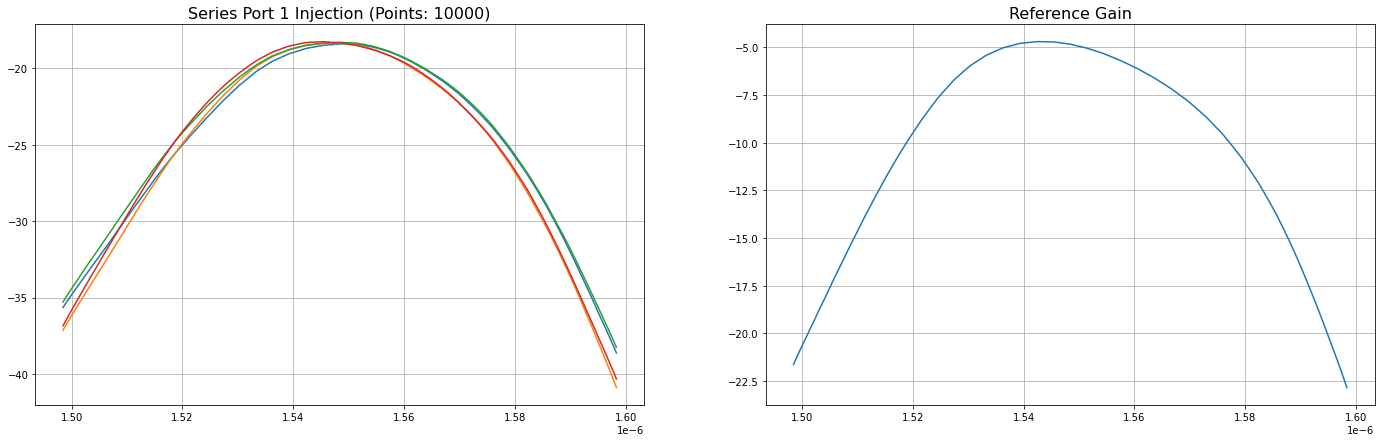

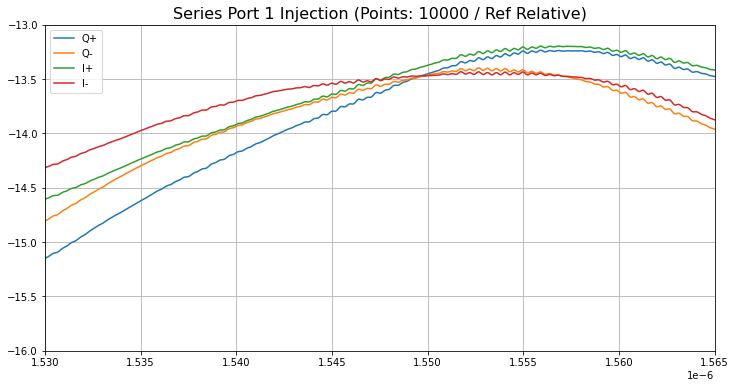

In [6]:
c = 299792458
mmi.select('ONA_1')
CenterWv = c/mmi.get('center frequency')
RangeWv = mmi.get('frequency range')*CenterWv**2/c

Res_QP = np.array(mmi.getresultdata('ONA_1','input 1/mode 1/gain')[:,0])
Res_IP = np.array(mmi.getresultdata('ONA_1','input 2/mode 1/gain')[:,0])
Res_QN = np.array(mmi.getresultdata('ONA_1','input 3/mode 1/gain')[:,0])
Res_IN = np.array(mmi.getresultdata('ONA_1','input 4/mode 1/gain')[:,0])
Xarray = np.linspace(CenterWv-RangeWv/2,CenterWv+RangeWv/2,10000)
print(f'Center Wavelength: {CenterWv}, Limits: {CenterWv-RangeWv/2}/{CenterWv+RangeWv/2}')

infile = open(os.path.join('SavedData', 'RefGain_Couplers') , 'rb')
DataLoaded = plk.load(infile)
infile.close()

fig, ax= plt.subplots(1,2,figsize=(24,7))
ax[0].set_title(f'Series Port 1 Injection (Points: {len(Xarray)})', fontsize=16)
ax[0].plot(Xarray,Res_QP, label='Q+')
ax[0].plot(Xarray,Res_QN, label='Q-')
ax[0].plot(Xarray,Res_IP, label='I+')
ax[0].plot(Xarray,Res_IN, label='I-')
ax[0].grid(True)

ax[1].set_title(f'Reference Gain', fontsize=16)
ax[1].plot(Xarray,DataLoaded['ResRef'], label='Ref')
ax[1].grid(True)

plt.figure(figsize=(12,6))
plt.title(f'Series Port 1 Injection (Points: {len(Xarray)} / Ref Relative)', fontsize=16)
plt.plot(Xarray,Res_QP - DataLoaded['ResRef'], label='Q+')
plt.plot(Xarray,Res_QN - DataLoaded['ResRef'], label='Q-')
plt.plot(Xarray,Res_IP - DataLoaded['ResRef'], label='I+')
plt.plot(Xarray,Res_IN - DataLoaded['ResRef'], label='I-')
plt.grid(True)
plt.legend()
plt.xlim(1530e-9,1565e-9)
plt.ylim(-16,-13)

datapath = 'Media'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig("Media/Series2_CHIP" + str(file_count) + ".png", transparent=False, facecolor="white", bbox_inches="tight")

## Single outport response

### Saving

Center Wavelength: 1.5483870967728607e-06, Limits: 1.49843912590793e-06/1.5983350676377913e-06


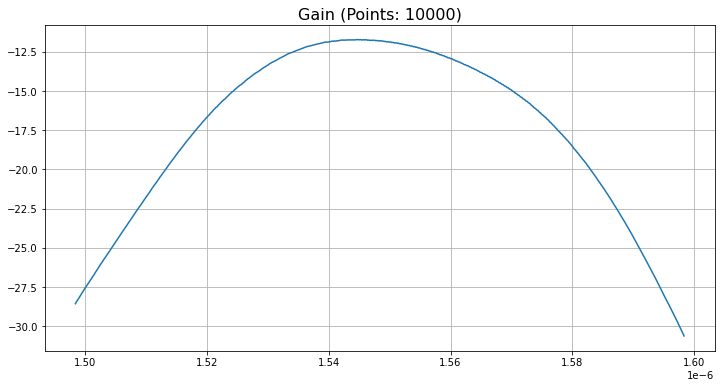

In [6]:
c = 299792458
mmi.select('ONA_1')
CenterWv = c/mmi.get('center frequency')
RangeWv = mmi.get('frequency range')*CenterWv**2/c

ResRef = np.array(mmi.getresultdata('ONA_1','input 4/mode 1/gain')[:,0])
Xarray = np.linspace(CenterWv-RangeWv/2,CenterWv+RangeWv/2,10000)
print(f'Center Wavelength: {CenterWv}, Limits: {CenterWv-RangeWv/2}/{CenterWv+RangeWv/2}')
plt.figure(figsize=(12,6))
plt.title(f'Gain (Points: {len(Xarray)})', fontsize=16)
plt.plot(Xarray,ResRef, label='Ref')
plt.grid(True)
# plt.xlim(1530e-9,1565e-9)
# plt.ylim(-8,-5)

DataRef = {'Xarray':Xarray, 'ResRef':ResRef}

MSOutfile = open('SavedData/Port4','wb')
plk.dump(DataRef,MSOutfile)
MSOutfile.close()

### Loading all

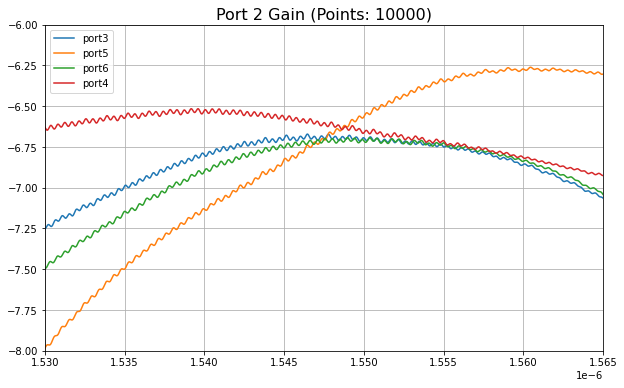

In [12]:
infile = open(os.path.join('SavedData', 'Port3') , 'rb')
DataLoaded1 = plk.load(infile)
infile.close()

infile = open(os.path.join('SavedData', 'Port5') , 'rb')
DataLoaded2 = plk.load(infile)
infile.close()

infile = open(os.path.join('SavedData', 'Port6') , 'rb')
DataLoaded3 = plk.load(infile)
infile.close()

infile = open(os.path.join('SavedData', 'Port4') , 'rb')
DataLoaded4 = plk.load(infile)
infile.close()

infile = open(os.path.join('SavedData', 'RefGain_Couplers') , 'rb')
DataLoadedRef = plk.load(infile)
infile.close()

plt.figure(figsize=(10,6))
plt.title(f'Port 2 Gain (Points: {len(Xarray)})', fontsize=16)
plt.plot(Xarray,DataLoaded1['ResRef'][::-1] - DataLoadedRef['ResRef'][::-1] + 0.336, label='port3')
plt.plot(Xarray,DataLoaded2['ResRef'][::-1] - DataLoadedRef['ResRef'][::-1] + 0.28, label='port5')
plt.plot(Xarray,DataLoaded3['ResRef'][::-1] - DataLoadedRef['ResRef'][::-1] + 0.28, label='port6')
plt.plot(Xarray,DataLoaded4['ResRef'][::-1] - DataLoadedRef['ResRef'][::-1] + 0.336, label='port4')
plt.grid(True)
plt.legend()
plt.xlim(1530e-9,1565e-9)
plt.ylim(-8,-6)

datapath = 'Media'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig("Media/Port 2 CHIP gain" + str(file_count) + ".png", transparent=False, facecolor="white", bbox_inches="tight")